<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/pendulum/Double_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [36]:
def forwardEuler(f, t_i, y_i, dt):
  y_next = y_i + dt*f(t_i, y_i)
  return y_next

def rungeKutta4(f, t_i, y_i, dt):
  f_1 = f(t_i, y_i)
  f_2 = f(t_i + dt/2, y_i + (1/2)*dt*f_1)
  f_3 = f(t_i + dt/2, y_i + (1/2)*dt*f_2)
  f_4 = f(t_i + dt, y_i + dt*f_3)

  y_next = y_i + (1/6)*dt*(f_1 + 2*f_2 + 2*f_3 + f_4)

  return y_next

**Double Pendulum Equations**

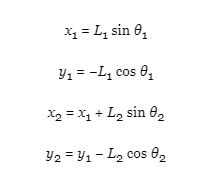

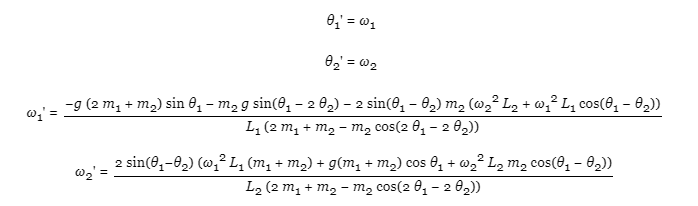

In [37]:
a = 2 + 3 \
    + 5 + 2
a

12

In [77]:

'''
Attributes
----------
- ts (list)      : saves the time steps
- g (float)      : value for gravitational constant in m/s
- L (float)      : value for the length of the rope in m
- b (float)      : value for dampening term (needs to be negative) [from task 6]
- step (float)   : value for the step size (in seconds)
- theta_1s (list)  : list of angular positions for 1st pendulum (angles are in radians)
- angVel_1s (list) : list of angular velocities for 1st pendulum (in radians per second)
- theta_2s (list)  : list of angular positions for 2nd pendulum (angles are in radians)
- angVel_2s (list) : list of angular velocities for 2nd pendulum (in radians per second)
- pos (list)     : x and y coordinates for the pendulum's bob (how would you get those?)

Methods
-------
- update        : uses RK4 to update the variables
- displayGraphs : display graphs of time vs position, time vs velocity, and position vs velocity

*The animation function was provided in another cell
'''

class DoublePendulum:
    '''
    This function initializes the class. The attributes are described above and
    the following are not options: theta, angVel, and stepSize.
    '''
    def __init__(self, theta1, theta2, angVel1, angVel2, stepSize, L1 = 3, L2 = 3, 
                 m1 = 0.25, m2 = 0.25, dampening = 0):
        self.theta_1s = [theta1]
        self.angVel_1s = [angVel1]
        self.theta_2s = [theta2]
        self.angVel_2s = [angVel2]
        self.step = stepSize
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.ts = [0]
        self.b = dampening
        self.g = 9.81

        x1 = self.L1*np.sin(theta1)
        y1 = -self.L1*np.cos(theta1)

        x2 = x1 + self.L2*np.sin(theta2)
        y2 = y1 -self.L2*np.cos(theta2)

        self.pos1 = (x1,y1)
        self.pos2 = (x2,y2)

        
    def derivative(self, time, state):
        '''
        return the derivatives of our state variables
        '''
        theta1, theta2, angVel1, angVel2 = state
        

        theta1_prime = angVel1
        theta2_prime = angVel2

        m1, m2, L1, L2, g = self.m1, self.m2, self.L1, self.L2, self.g

        p1 = -g * (2*m1+m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2*theta2) - \
            2 * np.sin(theta1 - theta2) * m2 * (angVel2**2 * L2 + \
                                                angVel1**2 * L1 * np.cos(theta1 - theta2))


        p2 = 2 * np.sin(theta1 - theta2) * (angVel1**2 * L1 * (m1 + m2)) + \
            g * (m1 + m2) * np.cos(theta1) + \
            angVel2**2 * L2 * m2 * np.cos(theta1 - theta2)

        q1 = L1 * (2*m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))
        q2 = L2 * (2*m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))

        angVel1_prime = p1 / q1
        angVel2_prime = p2 / q2

        return np.array((theta1_prime, theta2_prime, angVel1_prime, angVel2_prime))

    def update(self):
        '''
        Updates the variables using RK4. Remember not only to add the new position and
        velocity to their respective lists but also to update the parameter self.pos in
        case you want to use the animation provided
        '''
        state = (self.theta_1s[-1], self.theta_2s[-1], self.angVel_1s[-1], self.angVel_2s[-1])
        next_state = rungeKutta4(self.derivative, self.ts[-1], state, self.step)
		        
        theta1, theta2, angVel1, angVel2 = next_state

        self.theta_1s.append(theta1)
        self.theta_2s.append(theta2)

        self.angVel_1s.append(angVel1)
        self.angVel_2s.append(angVel2)

        x1 = self.L1*np.sin(theta1)
        y1 = -self.L1*np.cos(theta1)

        x2 = x1 + self.L2*np.sin(theta2)
        y2 = y1 -self.L2*np.cos(theta2)

        self.pos1 = (x1,y1)
        self.pos2 = (x2, y2)

        t_next = self.ts[-1] + self.step
        self.ts.append(t_next)

    def displayGraphs(self):
        '''
        This function should plot the following graphs:
        - time vs angular position
        - time vs angular velocity
        - angular position vs angular velocity
        '''
        %matplotlib inline
        plt.figure(figsize=(18,6))
        plt.subplot(131)
        plt.plot(self.ts, self.theta_1s)
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Position 1')
        
        plt.subplot(132)
        plt.plot(self.ts, self.angVel_2s)
        plt.xlabel('Time (s)')
        plt.ylabel('Angular Velocity 1')

        plt.subplot(133)
        plt.plot(self.theta_1s, self.angVel_1s)
        plt.xlabel('Angular Position 1')
        plt.ylabel('Angular Velocity 1')

        plt.show()
    
    def display(self):
        lines  = [None, None, None, None]
        fig    = plt.figure(figsize =(8,8))
        L = self.L1 + self.L2
        ax     = plt.subplot(xlim = (-L*1.5, L*1.5), ylim = (-L*1.5, L*1.5))

        # initialize lines to certain values
        lines[0], = ax.plot([self.pos1[0]], [self.pos1[1]], ms = 20, color = 'red', marker = 'o')  
        lines[1], = ax.plot([0, self.pos1[0]], [0, self.pos1[1]], color = 'blue')

        lines[2], = ax.plot([self.pos2[0]], [self.pos2[1]], ms = 20, color = 'red', marker = 'o')  
        lines[3], = ax.plot([self.pos1[0], self.pos2[0]], [self.pos1[1], self.pos2[1]], color = 'green')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.hlines(0, -2, 2, ls = 'dotted')

        plt.show()

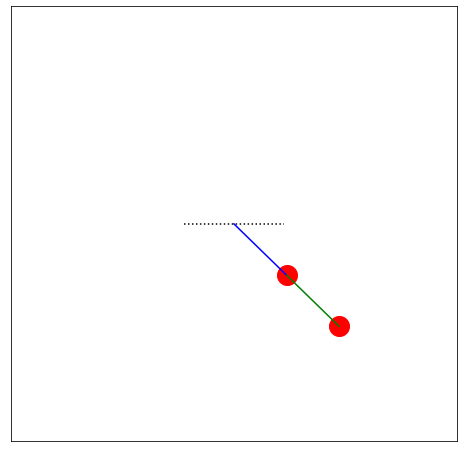

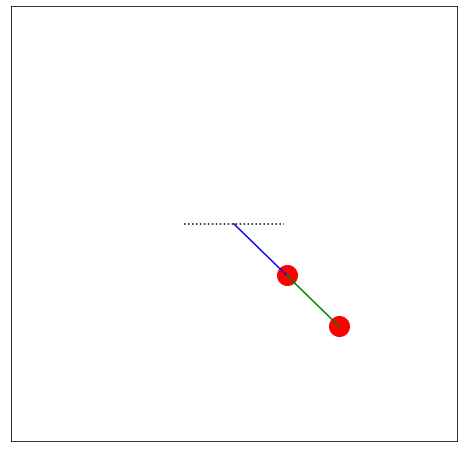

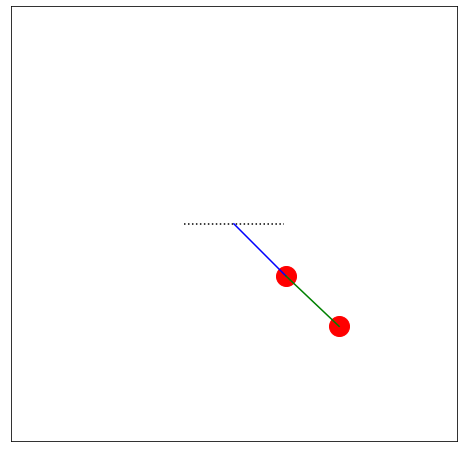

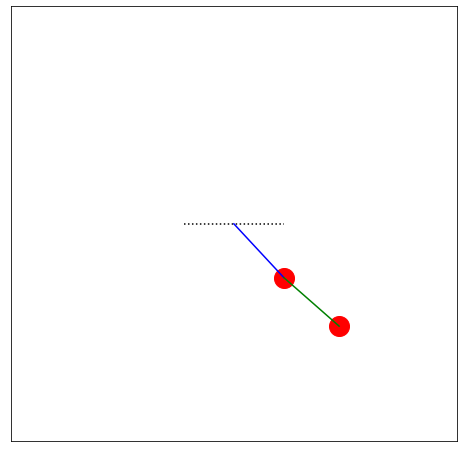

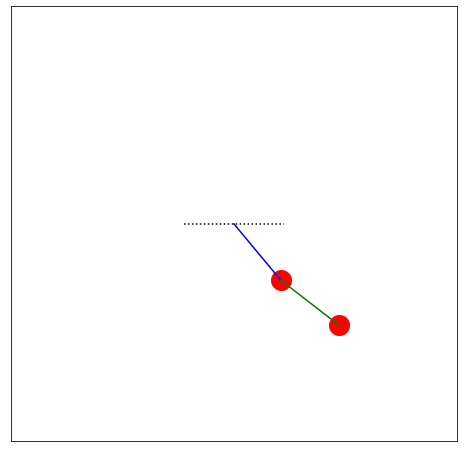

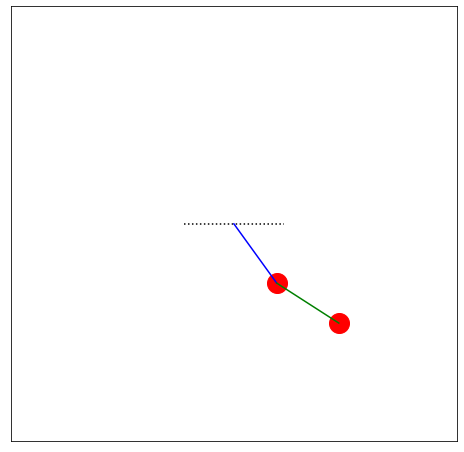

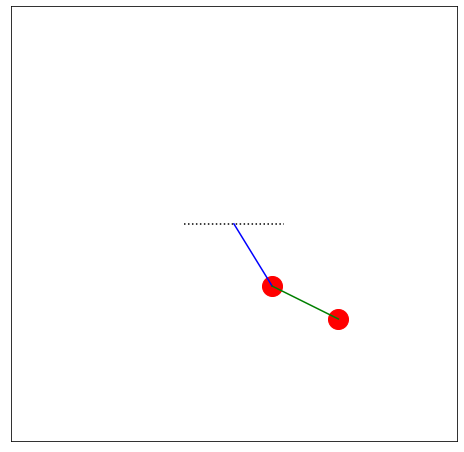

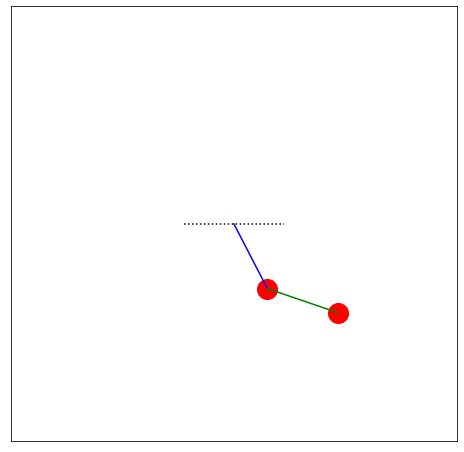

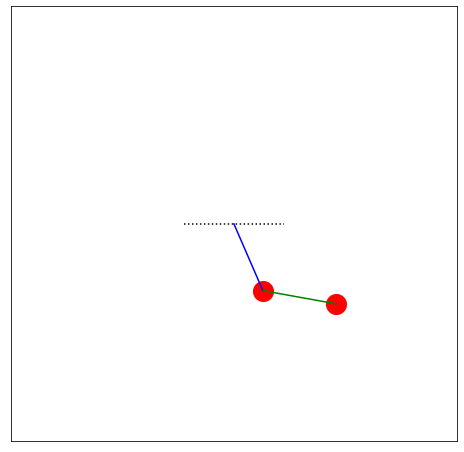

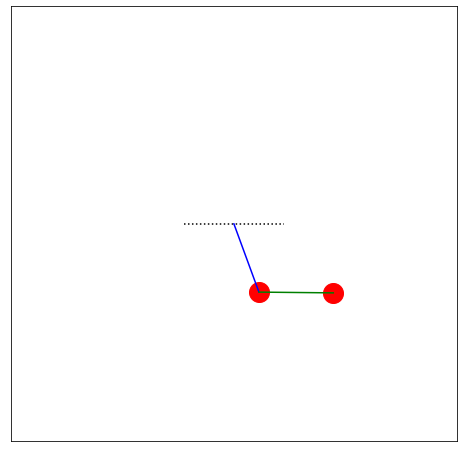

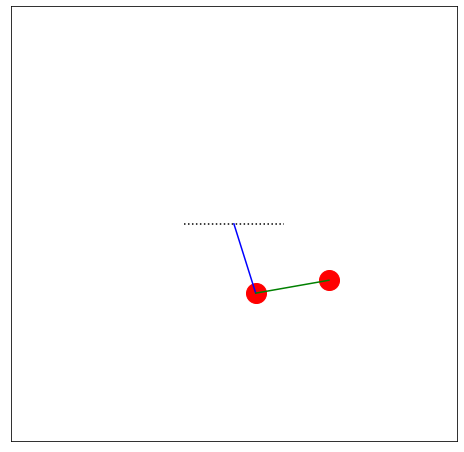

In [82]:
theta1 = np.pi/4
theta2 = np.pi/4

angVel1 = 0
angVel2 = 0
k = 0.01
b = 0
A = 0
omega = 0

sys = DoublePendulum(theta1, theta2, angVel1, angVel2, k)
sys.display()

for i in range(100):
    sys.update()

    if i%10 == 0:
        sys.display()

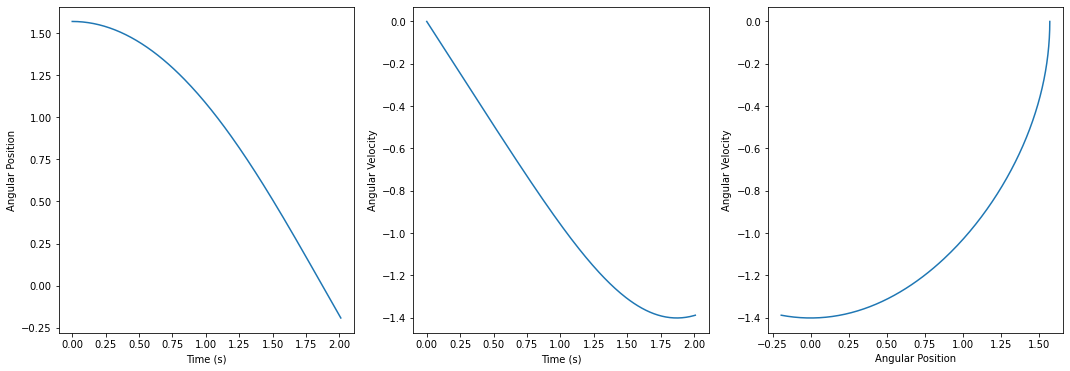

In [ ]:
sys.displayGraphs()

## Animation Code

https://www.myphysicslab.com/pendulum/double-pendulum-en.html

Here, they used,
$$
L_1 = L_2 = 1\\
m_1 = m_2 = 2\\
\theta_1 = 0.4\\
\theta_2 = 0\\
\omega_1 = \omega_2 = 0
$$

This is the expected graph of theta1 (green) and theta2 (red) over time:

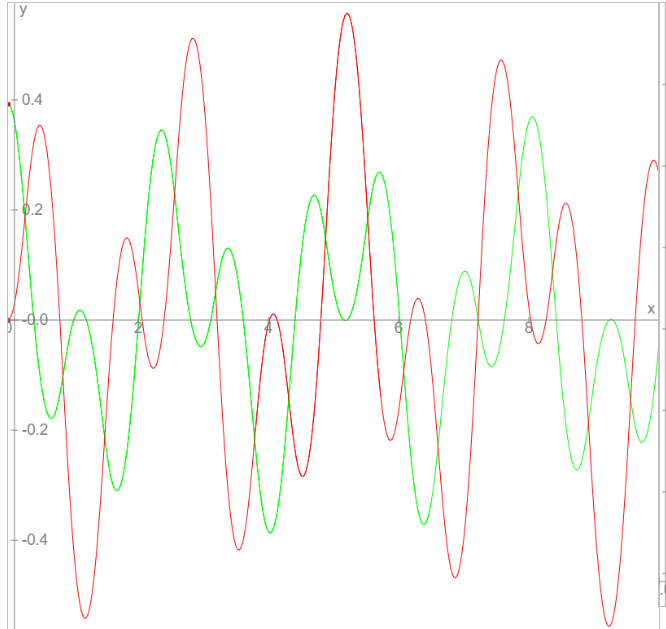

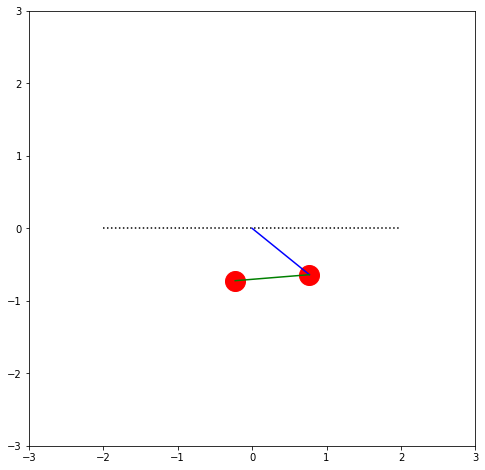

In [80]:
from IPython.display import HTML
theta1 = 0.4
theta2 = 0

angVel1 = 0
angVel2 = 0
k = 0.008
b = 0
A = 0
omega = 0
L1 = 1
L2 = 1
m1 = 2
m2 = 2

sys = DoublePendulum(theta1, theta2, angVel1, angVel2, k, L1, L2, m1, m2)

#############
# ANIMATION #
#############

#%matplotlib notebook

# create figure, axis, and lines for drawing
lines  = [None, None, None, None]
fig    = plt.figure(figsize =(8,8))
L = L1 + L2
ax     = plt.subplot(xlim = (-L*1, L*1), ylim = (-L*1, L*1))

# initialize lines to certain values
lines[0], = ax.plot([sys.pos1[0]], [sys.pos1[1]], ms = 20, color = 'red', marker = 'o')  
lines[1], = ax.plot([0, sys.pos1[0]], [0, sys.pos1[1]], color = 'blue')

lines[2], = ax.plot([sys.pos2[0]], [sys.pos2[1]], ms = 20, color = 'red', marker = 'o')  
lines[3], = ax.plot([sys.pos1[0], sys.pos2[0]], [sys.pos1[1], sys.pos2[1]], color = 'green')

#ax.set_xticks([])
#ax.set_yticks([])
ax.hlines(0, -2, 2, ls = 'dotted')


def animate(i):
    sys.update()
    lines[0].set_data(sys.pos1[0], sys.pos1[1])
    lines[1].set_data([0, sys.pos1[0]], [0, sys.pos1[1]])
    lines[2].set_data(sys.pos2[0], sys.pos2[1])
    lines[3].set_data([sys.pos1[0], sys.pos2[0]], [sys.pos1[1], sys.pos2[1]])
    return lines
    
    
# starts animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 500), interval = 10, blit = True)
HTML(ani.to_html5_video())

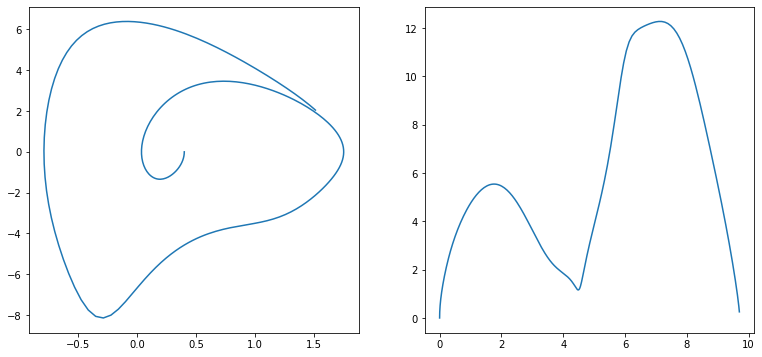

In [81]:
plt.figure(figsize=(13,6))

plt.subplot(121)
plt.plot(sys.theta_1s[:328], sys.angVel_1s[:328])

plt.subplot(122)
plt.plot(sys.theta_2s[:328], sys.angVel_2s[:328])


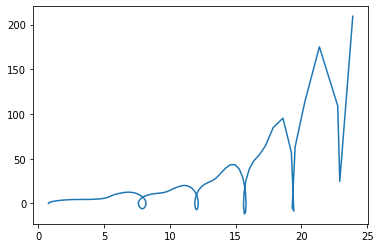

In [74]:
plt.plot(sys.theta_2s[:328], sys.angVel_2s[:328])


In [59]:
from IPython.display import HTML

theta = np.pi/2
angVel = 0
k = 0.01
L = 10
b = 1.6
sys = SimplePendulum(theta, angVel, k, L, b)

#############
# ANIMATION #
#############

#%matplotlib notebook

# create figure, axis, and lines for drawing
lines  = [None, None]
fig    = plt.figure(figsize =(3,3))
ax     = plt.subplot(xlim = (-sys.L*1.5, sys.L*1.5), ylim = (-sys.L*1.5, sys.L*1.5))

# initialize lines to certain values
lines[0], = ax.plot([sys.pos[0]], [sys.pos[1]], ms = 20, color = 'red', marker = 'o')  
lines[1], = ax.plot([0, sys.pos[0]], [0, sys.pos[1]], color = 'blue')

ax.set_xticks([])
ax.set_yticks([])
ax.hlines(0, -2, 2, ls = 'dotted')


def animate(i):
    sys.update()
    lines[0].set_data(sys.pos[0], sys.pos[1])
    lines[1].set_data([0, sys.pos[0]], [0, sys.pos[1]])
    return lines
    
    
# starts animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 2000), interval = 10, blit = True)
HTML(ani.to_html5_video())

NameError: ignored

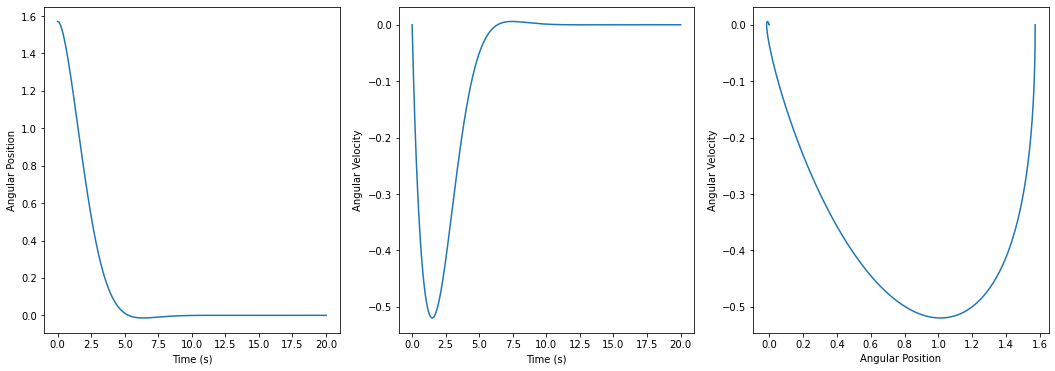

In [ ]:
sys.displayGraphs()